### Surface model example

This example shows how to fit the model taking margin of victory and surface into account.

There is a set of convenient functions in `jax_elo.models.correlated_skills_model` which we will use for this.

In [1]:
from jax_elo.models.correlated_skills_model import fit, calculate_ratings, predict, get_player_skill_history
from jax_elo.utils.data import get_data

/Users/ingramm/miniconda3/envs/tf/lib/python3.7/site-packages/jax/lib/xla_bridge.py:116: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
# Change this to where your data is located.
# This uses Jeff Sackmann's dataset, which is available here:
# https://github.com/JeffSackmann/tennis_atp
data = get_data('/Users/ingramm/Projects/tennis/tennis-data/data/sackmann/tennis_atp/')

In [3]:
to_use = data[data['tourney_date'].dt.year >= 2010]
to_use = to_use[to_use['surface'] != 'Carpet']
to_use = to_use.dropna(subset=['spw_winner', 'spw_loser'])

In [4]:
# Compute the margin on the % of service points won
margins = to_use['spw_winner'] - to_use['spw_loser']

In [5]:
# Fit the model -- this might take a few minutes (but not more than that)
params, opt_info = fit(to_use['winner_name'], to_use['loser_name'], to_use['surface'].values, 
                       margins=margins.values, verbose=True)

theta: {'a1': 0.010000000000000002, 'a2': array(0.), 'sigma_obs': 0.1, 'cov_mat': DeviceArray([[10000.000001,     0.      ,     0.      ],
             [    0.      , 10000.000001,     0.      ],
             [    0.      ,     0.      , 10000.000001]], dtype=float64)}
cov_mat: [[10000.000001     0.           0.      ]
 [    0.       10000.000001     0.      ]
 [    0.           0.       10000.000001]]
theta: {'a1': Traced<ShapedArray(float64[])>with<JVPTrace(level=1/1)>
  with primal = Traced<ShapedArray(float64[]):JaxprTrace(level=-1/1)>
       tangent = Traced<ShapedArray(float64[]):JaxprTrace(level=0/1)>, 'a2': Traced<ShapedArray(float64[])>with<JVPTrace(level=1/1)>
  with primal = Traced<ShapedArray(float64[]):JaxprTrace(level=-1/1)>
       tangent = Traced<ShapedArray(float64[]):JaxprTrace(level=0/1)>, 'sigma_obs': Traced<ShapedArray(float64[])>with<JVPTrace(level=1/1)>
  with primal = Traced<ShapedArray(float64[]):JaxprTrace(level=-1/1)>
       tangent = Traced<ShapedArray(float

theta: {'a1': 0.00012676603284580976, 'a2': array(0.10078032), 'sigma_obs': 0.0837015020144903, 'cov_mat': DeviceArray([[10514.92871975,  4617.09208092,  6556.2335129 ],
             [ 4617.09208092, 14626.23707176,  8245.62464508],
             [ 6556.2335129 ,  8245.62464508,  9128.48174594]],            dtype=float64)}
cov_mat: [[10514.92871975  4617.09208092  6556.2335129 ]
 [ 4617.09208092 14626.23707176  8245.62464508]
 [ 6556.2335129   8245.62464508  9128.48174594]]
theta: {'a1': 0.00012822036431076807, 'a2': array(0.10126104), 'sigma_obs': 0.08378587952102796, 'cov_mat': DeviceArray([[10436.36859674,  4871.54483723,  6316.5050668 ],
             [ 4871.54483723, 14837.9447391 ,  8255.17070794],
             [ 6316.5050668 ,  8255.17070794,  8322.54326457]],            dtype=float64)}
cov_mat: [[10436.36859674  4871.54483723  6316.5050668 ]
 [ 4871.54483723 14837.9447391   8255.17070794]
 [ 6316.5050668   8255.17070794  8322.54326457]]
theta: {'a1': 0.00013149165780549632, 'a2':

theta: {'a1': 0.00014024375687322609, 'a2': array(0.09961194), 'sigma_obs': 0.08338481515853483, 'cov_mat': DeviceArray([[ 8626.92281367,  4253.84687625,  5375.0336087 ],
             [ 4253.84687625, 10775.82052085,  7049.87284423],
             [ 5375.0336087 ,  7049.87284423,  6891.55547721]],            dtype=float64)}
cov_mat: [[ 8626.92281367  4253.84687625  5375.0336087 ]
 [ 4253.84687625 10775.82052085  7049.87284423]
 [ 5375.0336087   7049.87284423  6891.55547721]]
theta: {'a1': 0.00014023910711765758, 'a2': array(0.09961298), 'sigma_obs': 0.08338524194527126, 'cov_mat': DeviceArray([[ 8627.64158665,  4253.5581219 ,  5375.6919927 ],
             [ 4253.5581219 , 10775.29115057,  7049.85147169],
             [ 5375.6919927 ,  7049.85147169,  6891.3135702 ]],            dtype=float64)}
cov_mat: [[ 8627.64158665  4253.5581219   5375.6919927 ]
 [ 4253.5581219  10775.29115057  7049.85147169]
 [ 5375.6919927   7049.85147169  6891.3135702 ]]
theta: {'a1': 0.00014023496562400015, 'a2'

In [6]:
# The parameters found are:
params

EloParams(theta={'a1': 0.00014024650276876346, 'a2': array(0.09961149), 'sigma_obs': 0.08338470228795579, 'cov_mat': DeviceArray([[ 8627.30531313,  4243.7595162 ,  5373.37062124],
             [ 4243.7595162 , 10776.60123434,  7050.64881994],
             [ 5373.37062124,  7050.64881994,  6889.66094134]],            dtype=float64)})

In [7]:
# We can now calculate the rating history:
history, final_rating_dict, mark_names = calculate_ratings(params, to_use['winner_name'], to_use['loser_name'],
                                                           to_use['surface'].values, margins.values)

 86%|████████▋ | 22609/26149 [00:31<00:04, 853.79it/s]


100%|██████████| 26149/26149 [00:36<00:00, 709.53it/s]


In [8]:
# Here's an example entry:
history[-1]

{'winner': 'Thiago Seyboth Wild',
 'loser': 'Casper Ruud',
 'winner_prior_mean': {'Clay': 1583.8764297219495,
  'Grass': 1541.2586994314195,
  'Hard': 1552.2410100169575},
 'loser_prior_mean': {'Clay': 1840.353160001463,
  'Grass': 1633.6345489346693,
  'Hard': 1683.1388007203066},
 'winner_prior_prob': 0.20846658704332074,
 'cur_mark': 'Clay'}

In [9]:
# We can predict matches on a particular surface
predict(final_rating_dict, params, 'Roger Federer', 'Tennys Sandgren', 'Hard', mark_names)

0.9338042575283271

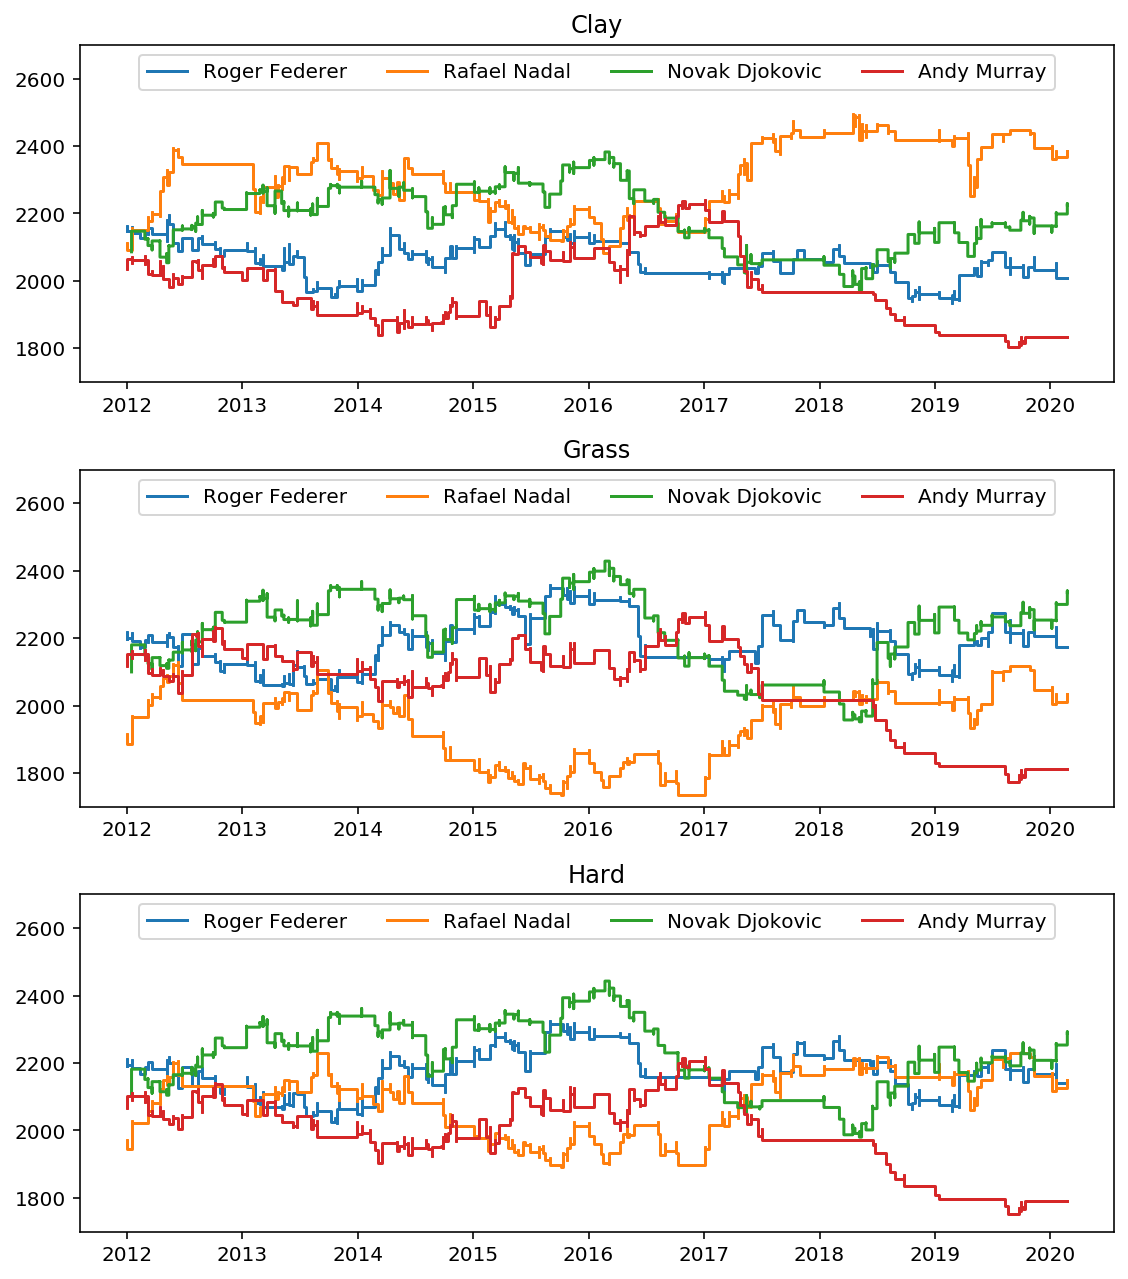

In [23]:
# We can plot the ratings over time:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(len(mark_names), 1)

start_year = 2012

for cur_player in ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray']:

    cur_history = get_player_skill_history(history, final_rating_dict, to_use['tourney_date'].values, cur_player)
    cur_history = cur_history[cur_history.index >= f'{start_year}-01-01']
    
    for cur_surface, cur_ax in zip(mark_names, ax.reshape(-1)):
        cur_ax.step(cur_history.index, cur_history[cur_surface].values, label=cur_player)
        cur_ax.legend(ncol=4, loc='upper center')
        cur_ax.set_title(cur_surface)
        cur_ax.set_ylim(1700, 2700)

f.set_size_inches(8, 9)
f.tight_layout()


In [11]:
# We can look at the marginal standard deviations on each surface
import numpy as np
import pandas as pd

prior_sd = pd.Series(np.sqrt(np.diag(params.theta['cov_mat'])), mark_names)
print(prior_sd)

Clay      92.883289
Grass    103.810410
Hard      83.003981
dtype: float64


In [12]:
# Finally, we can look at the correlation matrix between surface results
def covar_to_corr(covar_mat):
    # Turns a covariance matrix into a correlation matrix

    marg_var = np.diag(covar_mat)
    marg_sd = np.sqrt(marg_var)
    inv_marg = np.diag(1. / marg_sd)

    return np.dot(np.dot(inv_marg, covar_mat), inv_marg)

corr_mat = covar_to_corr(params.theta['cov_mat'])

In [13]:
pd.DataFrame(corr_mat, index=mark_names, columns=mark_names).round(3)

,Clay,Grass,Hard
Clay,1.000,0.440,0.697
Grass,0.440,1.000,0.818
Hard,0.697,0.818,1.000


In [14]:
win_probs = np.stack([x['winner_prior_prob'] for x in history])
np.mean(np.log(win_probs))

-0.5901211185869473

In [15]:
# Compare with Elo:
from jax_elo.utils.elo import optimise_static_k, compute_elo_ratings

In [16]:
k, _ = optimise_static_k(to_use['winner_name'].values, to_use['loser_name'].values)

In [17]:
elo_results = pd.DataFrame(compute_elo_ratings(to_use['winner_name'].values, to_use['loser_name'].values, lambda _: k))

In [18]:
# Standard Elo has a lower log likelihood:
np.mean(np.log(elo_results['winner_prob']))

-0.6032609200891181

In [19]:
# Accuracy
np.mean(elo_results['winner_prob'] > 0.5)

0.6626639642051321